In [ ]:
### Proszę zrunować ten notatnik a na dole jest komander, który automatycznie
# wykona procedury

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### T_pqr

In [2]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

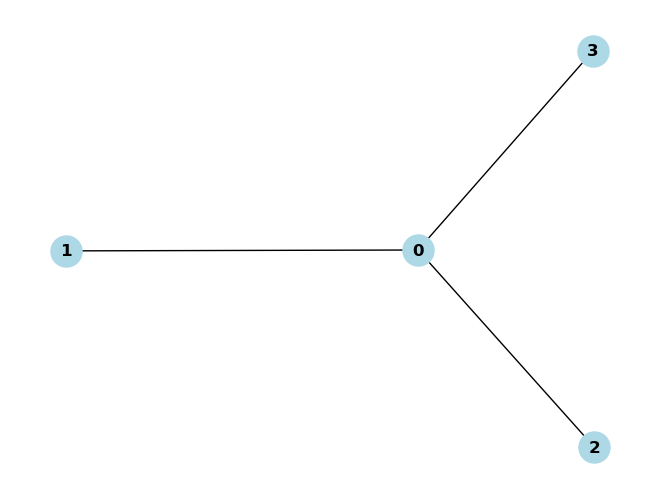

In [3]:
D5 = T_pqr(2,2,2)
labels = {n: D5.nodes[n] for n in D5.nodes}
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

### WAGI WIERZCHOŁKÓW z listy

In [4]:
def nadawanie_wag(G, wagi_lista):
    wagi = []
    for idx, weight in enumerate(wagi_lista):
        G.add_node(idx, weight=weight) 
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi 

### Odbicie do listy

In [5]:
def odbicie(G, node):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

### Eliminacja minusów

In [6]:
wagi_lista = [1,-1,-1,1]

In [7]:
def pozytywne(G):
    for node, data in G.nodes(data=True):
        if data['weight'] is not None and data['weight'] < 0:
            return False
    return True

In [8]:
def ro_1(G):    
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] -= 1
        weights.append( G.nodes[node]['weight'])
    return weights

In [9]:
# nieefektywnie jedzie po ujemnych wierzchołkach
def zmiana_na_dodatnie(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        nodes_ujemne = [node for node, data in G.nodes(data='weight') if data is not None and data < 0]
        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 10:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_ujemne:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

In [10]:
def ro_2(G):
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] += 1
        weights.append( G.nodes[node]['weight'])
    print(f"Wagi po zastosowaniu operacji ro  {weights}")

In [11]:
def relations(tableau):
    rows, cols = tableau.shape
    for i in range(rows):
        for j in range(cols - 1):
            if tableau[i, j] > tableau[i, j + 1]:
                tableau[i, j], tableau[i, j + 1] = tableau[i, j + 1], tableau[i, j]

    for i in range(rows - 1):
        for j in range(cols):
            if j == 0 and tableau[i, j] > tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
            elif tableau[i, j] > tableau[i + 1, j] and tableau[i, j - 1] < tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
    
    return tableau

In [12]:
def wiersze_relacje(tableau):
    for row in tableau:
        for i in range(len(row)-1):
            if row[i] > row[i + 1]:
                row[i], row[i + 1] = row[i + 1], row[i]
    return tableau

# omijanie miejsc minusów

In [11]:
def omijanie_ujemnych(G, lista, count=0):
    nodes_z_odbiciem = []
    wagi = []
    Y = lista
    while True:
        nodes_dodatnie = [node for node, data in G.nodes(data='weight') if (data is not None and data < 0 and node not in Y)]
        if not nodes_dodatnie:
            break 
        for node in nodes_dodatnie:
            odbicie(G, node)  
            nodes_z_odbiciem.append(node)
            count += 1
            if count > 10000000:  
                print("Maximum number of iterations reached. Exiting loop.")
                break
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")


### Do komandera

In [14]:
def main(p, q, r, G, wagi_lista, lista):
    p = int(p)
    q = int(q)
    r = int(r)
    G = T_pqr(p, q, r)
    wagi_lista = [int(waga) for waga in wagi_lista] 
    lista = [int(waga) for waga in lista]
    nadawanie_wag(G, wagi_lista)
    omijanie_ujemnych(G, lista, count=0)
    
if __name__ == "__main__":
    p = int(input("Podaj wartość dla p: "))
    q = int(input("Podaj wartość dla q: "))
    r = int(input("Podaj wartość dla r: "))
    wagi_lista = input("Podaj wartości wag jako listę: ").split(",")
    lista = input("Wskaż wierzchołki do omijania: ").split(",")
    G = T_pqr(p, q, r)
    main(p, q, r, G, wagi_lista, lista)

Podaj wartość dla p:  2
Podaj wartość dla q:  2
Podaj wartość dla r:  2
Podaj wartości wag jako listę:  1,2,-3,4
Wskaż wierzchołki do omijania:  2


Wierzchołki w kolejności wywoływania:  [], wagi na końcu: [1, 2, -3, 4], count:  0
